In [1]:
from param_analysis import ParameterAnalysis
import plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

connectedness_values = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
ecb_precision_gammas = [2,5,9]

num_agent_values = [4,5,6,7,8]


env_precision_gammas = [10]
b_precision_gammas = [5]

n_trials = 30

In [4]:
params = ParameterAnalysis('results/testall_results_best.npz','results/testparams_best.npz', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)

In [5]:
params.n_d.value = num_agent_values[1]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[1]
params.ecb_d.value = ecb_precision_gammas[-2]

In [6]:
params.get_overall_metrics()

/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
def agent_reach(params):
    connections = params.adj_mat
    reaches = np.sum(connections,axis=1) / params.n_d.value
    return reaches

def get_sampling_matrix(params,t):
    actions = np.array(params.all_neighbour_samplings)
    sampling_matrix = np.zeros((params.n_d.value, params.n_d.value))
    for a in range(params.n_d.value):
        for read in actions[t,:,a]:
            sampling_matrix[a,int(read)] += 1
    return sampling_matrix
    

def conclusion_thresholds(params):
    N = params.n_d.value
    agent_thresholds = np.ones(N)
    for agent in range(N):
        average_t = []
        for t in range(30):
            belief_true = params.all_qs[t,-1,1,agent] > 0.8
            belief_false = params.all_qs[t,-1,1,agent] <0.2

            if belief_true:

                average_t.append(np.argmax(params.all_qs[t,:,1,agent] > 0.9))
            if belief_false:
                average_t.append(np.argmax(params.all_qs[t,:,0,agent] > 0.9))
        agent_thresholds[agent] = np.mean(average_t)
            
                        
    print(agent_thresholds)
    return agent_thresholds

def agent_leaning(params,t):
    beliefs = params.all_qs
    leanings = np.zeros(params.n_d.value)
    for a in range(params.n_d.value):
        a_beliefs = beliefs[t,:,:,a]
        leaning = np.average(a_beliefs,axis = 0)
        leanings[a] = np.max(leaning)
    return leanings

def confidences(params):
    c =[]
    for agent in range(params.n_d.value):
        average_c = []
        for t in range(30):
            value = params.all_qs[t,-1,1,agent] 
            if value> 0.5:
                average_c.append(value)
            else:
                average_c.append(1-value)
        c.append(np.mean(average_c))
    return c

[14.82608696 16.18181818 14.875      17.08695652 18.2        19.73913043
 22.36363636 25.        ]
[15.125      16.52       15.         13.68       15.67857143 14.43478261
 17.92307692 13.65384615]
[9.16666667 8.82758621 7.86206897 7.77777778 9.93333333 9.78571429
 7.5862069  8.34482759]


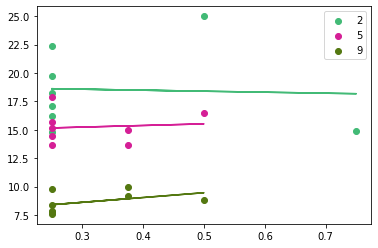

In [17]:
import random
all_reaches = []
all_conclusion_t = []
for ecb in ecb_precision_gammas:
    params.ecb_d.value = ecb
    params.c_d.value = 0.3
    params.n_d.value = 8
    params.get_all_sim_results_from_parameters()
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    reaches = agent_reach(params)[0]
    conclusion_t = conclusion_thresholds(params)

    for r in reaches:
        all_reaches.append(r)
    for ct in conclusion_t:
        all_conclusion_t.append(ct)
    plt.scatter(reaches, conclusion_t, color = color, label =ecb)
    m, b = np.polyfit(reaches, conclusion_t, 1)
    plt.plot( reaches, m* reaches+b, c = color)
    plt.legend()
    #plt.show()


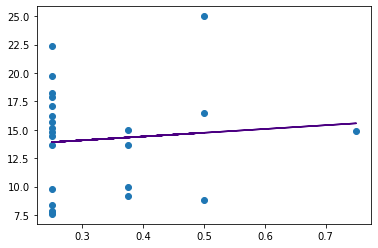

In [18]:
plt.scatter(all_reaches, all_conclusion_t)
m, b = np.polyfit(all_reaches, all_conclusion_t, 1)
plt.plot( np.array(all_reaches), m* np.array(all_reaches)+b, color = 'indigo')

[0.375 0.625 0.625 0.75  0.5   0.75  0.875 0.75 ]
[0.9157842830898666, 0.9049502419142456, 0.8920390415786116, 0.8275335896306437, 0.909891526336837, 0.8953131265660222, 0.9145575303331256, 0.8127676515617568]
[0.875 0.625 0.375 0.625 0.75  0.875 0.5   0.625]
[0.9248170401588521, 0.9217461655493956, 0.9350670331499005, 0.9321915653165763, 0.9363755136931222, 0.9308354203272161, 0.9329424506236202, 0.9327852736275449]
[0.75  0.625 0.75  0.5   0.625 0.5   0.5   0.75 ]
[0.9986556823921023, 0.9986407225500394, 0.9990087371976714, 0.9989834662807853, 0.9991176139055818, 0.9992163679771573, 0.998685326364008, 0.9991762817563089]


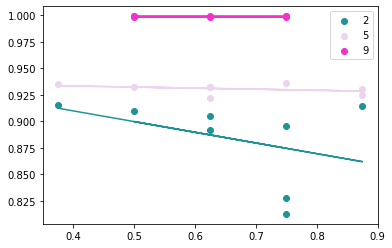

In [23]:
import random
all_reaches = []
all_confidences = []
for ecb in ecb_precision_gammas:
    params.ecb_d.value = ecb
    params.c_d.value = 0.8
    params.n_d.value = 8
    params.get_all_sim_results_from_parameters()
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    reaches = agent_reach(params)[0]
    confidence = confidences(params)
    print(reaches)
    print(confidence)
    for r in reaches:
        all_reaches.append(r)
    for ct in confidence:
        all_confidences.append(ct)
    plt.scatter(reaches, confidence, color = color, label =ecb)
    m, b = np.polyfit(reaches, confidence, 1)
    plt.plot( reaches, m* reaches+b, c = color)
    plt.legend()
    #plt.show()


In [24]:
reaches

array([0.75 , 0.625, 0.75 , 0.5  , 0.625, 0.5  , 0.5  , 0.75 ])

In [25]:
conclusion_t

array([9.16666667, 8.82758621, 7.86206897, 7.77777778, 9.93333333,
       9.78571429, 7.5862069 , 8.34482759])

In [26]:
params.ecb_d.value

9

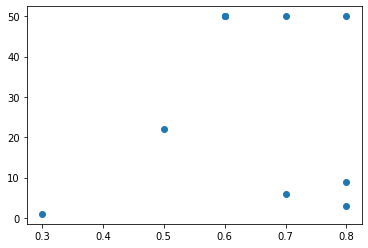

In [20]:
plt.scatter(reaches, conclusion_t)

In [ ]:
all_nr = np.zeros((len(connectedness_values)*30,6))
all_leanings = np.zeros((len(connectedness_values)*30,6))
all_times = np.zeros((len(connectedness_values)*30,6))

counter  =0
for c in connectedness_values:
    for n in num_agent_values:
        params.c_d.value = c
        params.n_d.value = n
        all_nr = np.zeros((len(connectedness_values)*4*30,n))
        all_leanings = np.zeros((len(connectedness_values)*4*30,n))
        all_times = np.zeros((len(connectedness_values)*4*30,n))

        params.get_all_sim_results_from_parameters()
        reaches = agent_reach(params)
        for t in range(30):
            sampling_matrix = get_sampling_matrix(params,t)
            num_reads = np.sum(sampling_matrix,axis=0)
            leanings = agent_leaning(params,t)
            times = conclusion_thresholds(params,t)
            all_nr[counter] = num_reads
            all_leanings[counter] = leanings
            all_times[counter] = times
            counter += 1

    print(len(all_nr))

    import matplotlib.pyplot as plt 
    plt.scatter(all_nr.flatten(), all_times.flatten())
    plt.show()

    plt.scatter(all_nr.flatten(), all_leanings.flatten())
    plt.show()

    plt.scatter(all_times.flatten(), all_leanings.flatten())

    plt.show()


In [12]:
import seaborn as sns

What is the relationship between the Cluster KL Divergence and The Davies Bouldin metric for clustering?

In [13]:
import matplotlib as mpl

cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

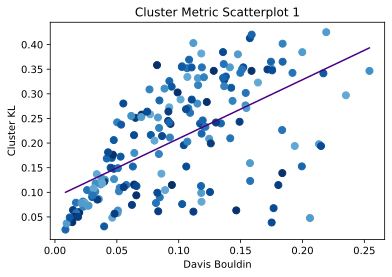

In [14]:
%config InlineBackend.figure_format = 'svg'
plt.scatter( params.db_indices, params.cluster_kls, c= np.random.rand(180), cmap = cmap, s = 50)
m, b = np.polyfit(params.db_indices, params.cluster_kls, 1)
plt.plot( params.db_indices, m* params.db_indices+b, c = "indigo")
plt.title("Cluster Metric Scatterplot 1")
plt.xlabel("Davis Bouldin")
plt.ylabel("Cluster KL")

plt.show()

Mostly correlated - both lower DB and lower KL should signify higher amount of clustering. The KL Divergence should be lowest when the agents have very strong beliefs in their idea (they have properly converged) whereas the DB index is low anytime the agents have very similar beliefs, regardless of how strong those beliefs are.

In [15]:
np.mean(params.sampling_ratios[:,0,:],axis=1).shape

(180,)

What about the relatinoship between Davies Bouldin and the Sampling ratio?

In [16]:
cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

Text(0.5, 1.0, 'Cluster Metric Scatterplot 2')

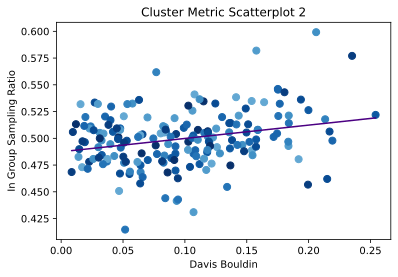

In [17]:
plt.xlabel("Davis Bouldin")
plt.ylabel("In Group Sampling Ratio")
plt.scatter(params.db_indices, np.mean(params.sampling_ratios[:,0,:],axis=1),c= np.random.rand(180), cmap=cmap, s = 50)
m, b = np.polyfit(params.db_indices, np.mean(params.sampling_ratios[:,0,:],axis=1), 1)
plt.plot( params.db_indices, m* params.db_indices+b, c = "indigo")
plt.title("Cluster Metric Scatterplot 2")

Text(0.5, 1.0, 'Cluster Metric Scatterplot 3')

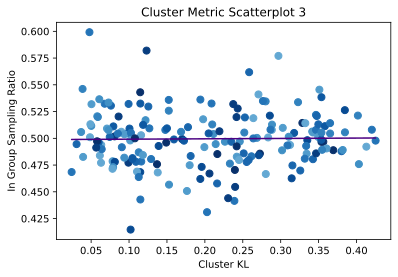

In [18]:
plt.xlabel("Cluster KL")
plt.ylabel("In Group Sampling Ratio")
plt.scatter(params.cluster_kls, np.mean(params.sampling_ratios[:,0,:],axis=1),c= np.random.rand(180), cmap=cmap, s = 50)
m, b = np.polyfit(params.cluster_kls, np.mean(params.sampling_ratios[:,0,:],axis=1), 1)


plt.plot( params.cluster_kls, m* params.cluster_kls+b, c = "indigo")
plt.title("Cluster Metric Scatterplot 3")

Overall it seems that the Davies bouldin is a better metric for clustering than the Cluster KL, as it is also somewhat linearly correlated with the in-group sampling ratio - i.e. a stronger cluster according to the Davies Bouldin index implies more in-group sampling.

How does ECB Precision affect clustering on average?

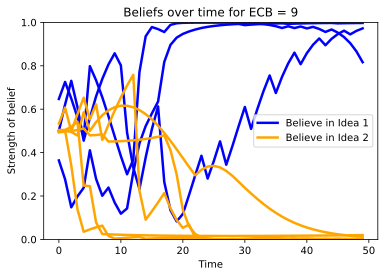

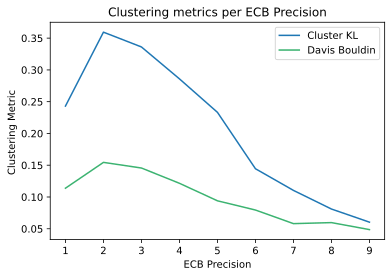

In [47]:
db_per_ecb = []
kl_per_ecb = []

for c in ecb_precision_gammas:
    c_params = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,2],c))[0]
    params_to_test = np.array(list(params.get_param_combinations()))[c_params]
    db_indices = params.db_indices[c_params]
    cluster_kl = params.cluster_kls[c_params]
    avg_db = np.average(db_indices)
    avg_kl = np.average(cluster_kl)
    kl_per_ecb.append(avg_kl)
    db_per_ecb.append(avg_db)
    
    
    
    #check the plots
    if c == 9:
        params.update_params(params_to_test[11])
        params.get_all_sim_results_from_parameters()
        plt.title("Beliefs over time for ECB = " + str(c))
        plots.plot_beliefs_over_time(params.all_qs[0,:,:,:])
        #plt.show()
        #plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
        #plt.title("Average Behaviour for ECB = 1")
        plt.show()
        break


plt.plot(ecb_precision_gammas, kl_per_ecb, label="Cluster KL")
plt.plot(ecb_precision_gammas, db_per_ecb, label = "Davis Bouldin", color = "mediumseagreen")
plt.legend()
plt.title("Clustering metrics per ECB Precision")
plt.xlabel("ECB Precision")
plt.ylabel("Clustering Metric ")
plt.show()


In [ ]:
#check the plots
params.update_params(no_ecb_params)
params.get_all_sim_results_from_parameters()
plots.plot_beliefs_over_time(params.all_qs[0,:,:,:])
plt.show()
plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour for ECB = 1")
plt.show()



On average, a higher ECB precision will lead to more clustering. 

What about the structure of the graph?

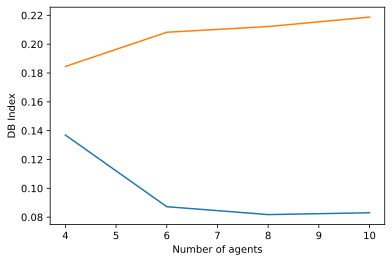

In [15]:

db_per_c = []
kl_per_c = []
for c in num_agent_values:
    c_params = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,0],c))[0]
    params_to_test = np.array(list(params.get_param_combinations()))[c_params]
    db_indices = params.db_indices[c_params]
    cluster_kls = params.cluster_kls[c_params]
    avg_db = np.average(db_indices)
    avg_kl = np.average(cluster_kls)
    db_per_c.append(avg_db)
    kl_per_c.append(avg_kl)

plt.plot(num_agent_values, db_per_c)
plt.plot(num_agent_values, kl_per_c)
plt.xlabel("Number of agents")
plt.ylabel("DB Index")
plt.show()

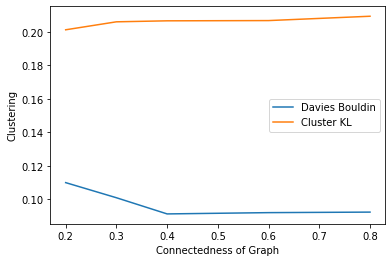

In [13]:

db_per_c = []
kl_per_c = []

for c in connectedness_values:
    c_params = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,1],c))[0]
    params_to_test = np.array(list(params.get_param_combinations()))[c_params]
    db_indices = params.db_indices[c_params]
    cluster_kl = params.cluster_kls[c_params]

    avg_db = np.average(db_indices)
    avg_kl = np.average(cluster_kl)
    db_per_c.append(avg_db)
    kl_per_c.append(avg_kl)

plt.plot(connectedness_values, db_per_c, label = "Davies Bouldin")
plt.plot(connectedness_values, kl_per_c, label = "Cluster KL")
plt.legend()
plt.xlabel("Connectedness of Graph")
plt.ylabel("Clustering")
plt.show()

More counterintuitive results.. seems that graph structure does affect clustering, but somehow the clustering measured by the DB index (more dense clusters) is strongest with fewer agents and a less connected graph, but the clustering measured by the KL divergence, has the opposite behaviour. This is particularly strange due to the correlation between the two metrics. I suppose what this means is, as the number of agents and their connectedness decrease, after averaging out the ECB, the agents will have more similar beliefs to each other on average - there is more opportunity to communicate, so the clusters will be denser on average. However, with more agents, it will become more unlikely for agents to become fully convinced in the beliefs of their group, since there will be more communication across groups.

For which parameters do we have the most extreme clustering according to these metrics?

Lowest DB index
(8, 0.2, 9, 5, 10)
0.024294256135711376


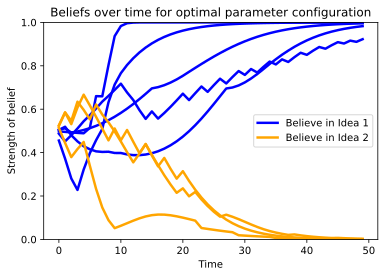

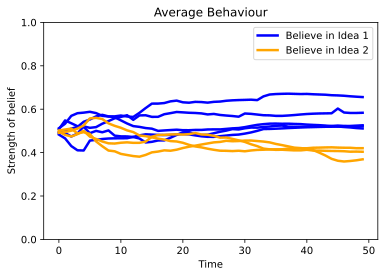

Text(0.5, 0, 'Timesteps')

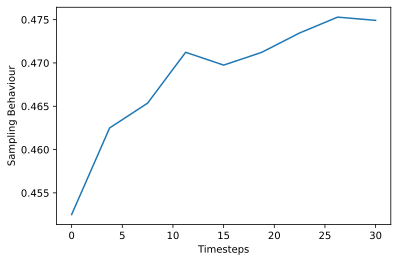

In [68]:
lowest_db_index = np.where(params.db_indices == min(params.db_indices))[0][0]

print("Lowest DB index")
db_params = list(params.get_param_combinations())[lowest_db_index]
print(db_params)
print(params.cluster_kls[lowest_db_index])

params.update_params(db_params)
params.get_all_sim_results_from_parameters()
plt.title("Beliefs over time for optimal parameter configuration")

plots.plot_beliefs_over_time(params.all_qs[-1,:,:,:])
plt.show()
plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour")
plt.show()

in_samples, out_samples = params.sampling_ratios[lowest_db_index]

plt.plot(np.linspace(0,params.all_qs.shape[0],9), in_samples, label="in group samples")
plt.ylabel("Sampling Behaviour")
plt.xlabel("Timesteps")

In [117]:
params.sampling_ratios_test[lowest_kl][22]


NameError: name 'lowest_kl' is not defined

In [118]:
out_samples

array([0.5475    , 0.5375    , 0.53463542, 0.52876984, 0.53024691,
       0.52877604, 0.52653509, 0.5247093 , 0.52508503])

Lowest Cluster KL
(8, 0.2, 9, 5, 10)


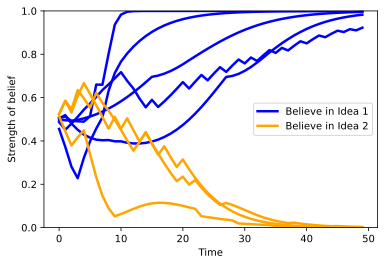

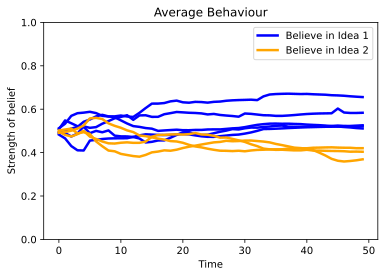

Text(0.5, 0, 'Timesteps')

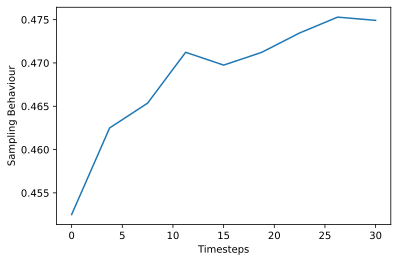

In [51]:
lowest_kl = np.where(params.cluster_kls == min(params.cluster_kls))[0][0]

print("Lowest Cluster KL")
kl_params = list(params.get_param_combinations())[lowest_kl]
print(kl_params)
params.update_params(kl_params)

params.get_all_sim_results_from_parameters()
plots.plot_beliefs_over_time(params.all_qs[-1,:,:,:])
plt.show()
plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour")
plt.show()

in_samples, out_samples = params.sampling_ratios[lowest_kl]

plt.plot(np.linspace(0,params.all_qs.shape[0],9), in_samples, label="in group samples")

plt.ylabel("Sampling Behaviour")
plt.xlabel("Timesteps")

So the lowest Cluster kl and the lowest DB index occurs for the same parameters - a high ECB, a large number of agents and a low connectedness of the graph. The high number of agents and low clustering would prevent a lot of agents from ever communicating from the get go - we can conclude a sprase graph structure leads more easily to clustering.

Now I can ask - can we ever achieve such strong clustering with a low ECB? 

7
0.30890781898397984
[ 6.   0.4  3.   5.  10. ]


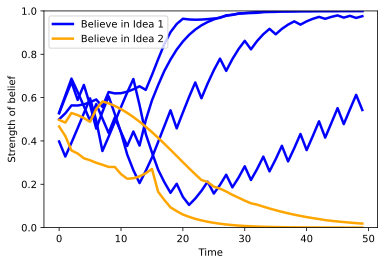

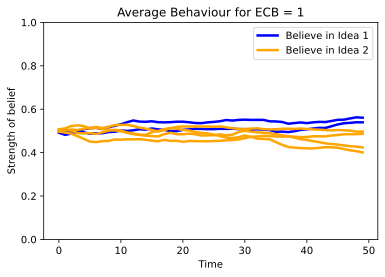

Text(0.5, 0, 'Timesteps')

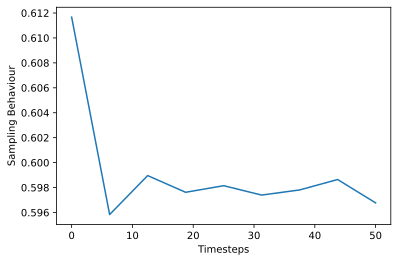

In [69]:
#What if ECB is 3
no_ecb = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,2],3))[0]
no_ecb_dbs = params.db_indices[no_ecb]
lowest_db_no_ecb = np.where(no_ecb_dbs == min(no_ecb_dbs))[0][0]
print(lowest_db_no_ecb)
print(params.cluster_kls[no_ecb][lowest_db_no_ecb])
no_ecb_params = np.array(list(params.get_param_combinations()))[no_ecb][lowest_db_no_ecb]
print(no_ecb_params)
#check the plots
params.update_params(no_ecb_params)
params.get_all_sim_results_from_parameters()
plots.plot_beliefs_over_time(params.all_qs[0,:,:,:])
plt.show()
plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour for ECB = 1")
plt.show()

in_samples, out_samples = params.sampling_ratios[lowest_db_no_ecb]

plt.plot(np.linspace(0,params.all_qs.shape[1],9), in_samples, label="in group samples")

plt.ylabel("Sampling Behaviour")
plt.xlabel("Timesteps")

In [55]:
params.all_qs.shape[0]

30

13
[ 8.   0.6  2.   5.  10. ]


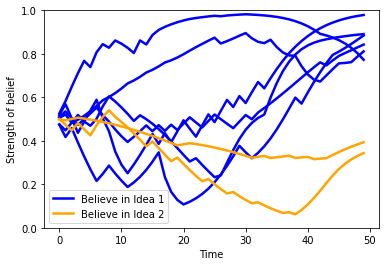

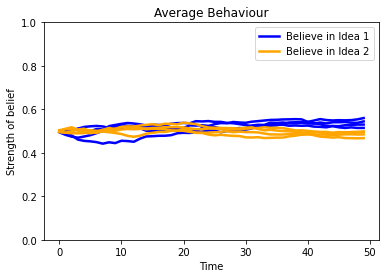

Text(0.5, 0, 'Timesteps')

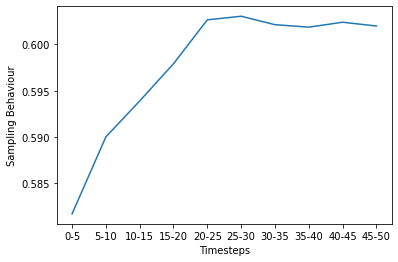

In [15]:
#What if ECB is 2?
no_ecb = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,2],2))[0]
no_ecb_dbs = params.db_indices[no_ecb]
lowest_db_no_ecb = np.where(no_ecb_dbs == min(no_ecb_dbs))[0][0]
print(lowest_db_no_ecb)
no_ecb_params = np.array(list(params.get_param_combinations()))[no_ecb][lowest_db_no_ecb]
print(no_ecb_params)
#check the plots
params.update_params(no_ecb_params)
params.get_all_sim_results_from_parameters()
plots.plot_beliefs_over_time(params.all_qs[0,:,:,:])
plt.show()

plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour")
plt.show()
in_samples, out_samples = params.sampling_ratios[highest_sr]

plt.plot(["0-5", "5-10","10-15","15-20", "20-25","25-30","30-35","35-40","40-45","45-50"], in_samples, label="in group samples")

plt.ylabel("Sampling Behaviour")
plt.xlabel("Timesteps")

It seems like with less epistemic confirmation bias, the graph must be slightly less sparse in order for clustering to occur, and the clustering is less defined. 

In [18]:
#should think of a better way to plot the averages .. like average only the beliefs of the individual clusters rather than just the entire matrix

Finally, I want to know whether there is any configuration that maximizes the in group sampling ratio. 

In [11]:
params.sampling_ratios.shape

(180, 2, 3)

In [12]:
params.sampling_ratios[highest_sr]

array([[0.70666667, 0.7125    , 0.71333333, 0.71416667, 0.71633333,
        0.71638889, 0.7152381 , 0.71520833, 0.71462963, 0.71383333],
       [0.29333333, 0.2875    , 0.28666667, 0.28583333, 0.28366667,
        0.28361111, 0.2847619 , 0.28479167, 0.28537037, 0.28616667]])

In [10]:
sr_params

(4, 0.2, 8, 5, 10)

Highest Sampling Ratio
(4, 0.2, 8, 5, 10)


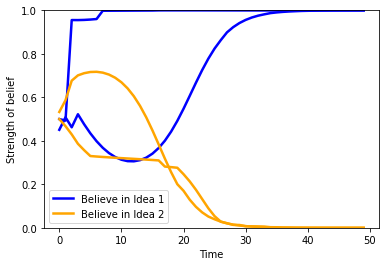

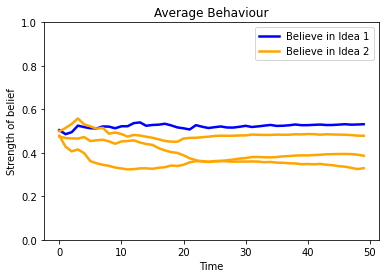

Text(0.5, 0, 'Timesteps')

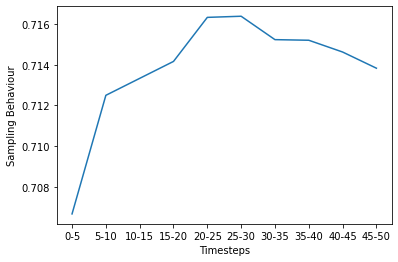

In [8]:
highest_sr = np.where(params.sampling_ratios[:,0,-1] == max(params.sampling_ratios[:,0,-1]))[0][0]

print("Highest Sampling Ratio")
sr_params = list(params.get_param_combinations())[highest_sr]
print(sr_params)
params.update_params(sr_params)
params.get_all_sim_results_from_parameters()
plots.plot_beliefs_over_time(params.all_qs[-1,:,:,:])
plt.show()
plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour")
plt.show()
in_samples, out_samples = params.sampling_ratios[highest_sr]

plt.plot(["0-5", "5-10","10-15","15-20", "20-25","25-30","30-35","35-40","40-45","45-50"], in_samples, label="in group samples")
#plt.plot(["0-5", "5-10", "10-15","15-20", "20-25","25-30","30-35","35-40","40-45","45-50"], out_samples, label = "out group samples")
plt.ylabel("Sampling Behaviour")
plt.xlabel("Timesteps")

In this case, it seems that the agents more often than not started off sampling in-group than out group. This happened in a sparse network with few agents and a high ECB precision. Nevertheless, it does not seem that in 50 timesteps, the agents ever reach a point where they only sample in group. Can media nodes, or more timesteps, allow this behaviour to occur?

Highest Sampling Ratio
(4, 0.4, 7, 5, 10)


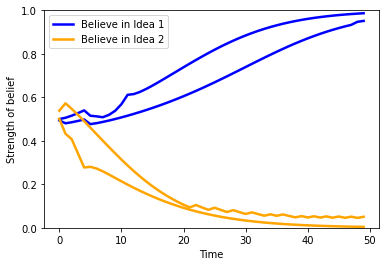

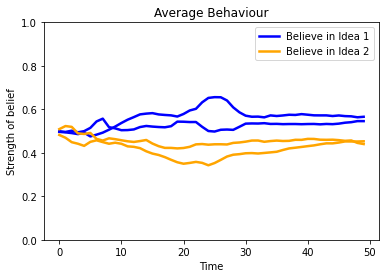

Text(0.5, 0, 'Timesteps')

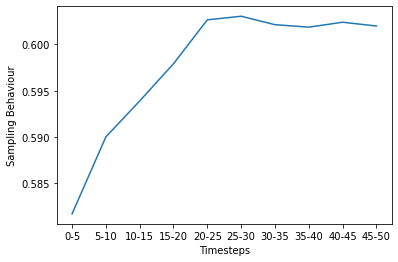

In [12]:
highest_sr = np.where((params.sampling_ratios[:,0,-1] -params.sampling_ratios[:,0,0])  == max((params.sampling_ratios[:,0,-1] -params.sampling_ratios[:,0,0])))[0][0]

print("Highest Sampling Ratio")
sr_params = list(params.get_param_combinations())[highest_sr]
print(sr_params)
params.update_params(sr_params)
params.get_all_sim_results_from_parameters()
plots.plot_beliefs_over_time(params.all_qs[-1,:,:,:])
plt.show()
plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour")
plt.show()
in_samples, out_samples = params.sampling_ratios[highest_sr]

plt.plot(["0-5", "5-10","10-15","15-20", "20-25","25-30","30-35","35-40","40-45","45-50"], in_samples, label="in group samples")
plt.ylabel("Sampling Behaviour")
plt.xlabel("Timesteps")

In [6]:

connectedness_values = [0.4]
ecb_precision_gammas = [7]

num_agent_values = [4]


env_precision_gammas = [10]
b_precision_gammas = [5]

n_trials = 30

In [7]:
params = ParameterAnalysis("results/all_results_best2.npz",num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)


In [8]:
params.n_d.value = num_agent_values[0]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[0]
params.ecb_d.value = ecb_precision_gammas[0]

In [9]:
np.linspace(0,150,10)

array([  0.        ,  16.66666667,  33.33333333,  50.        ,
        66.66666667,  83.33333333, 100.        , 116.66666667,
       133.33333333, 150.        ])

In [10]:
params.get_overall_metrics()

/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
params.get_all_sim_results_from_parameters()
x = np.array(params.sampling_ratios_test)

Highest Sampling Ratio
(4, 0.4, 7, 5, 10)


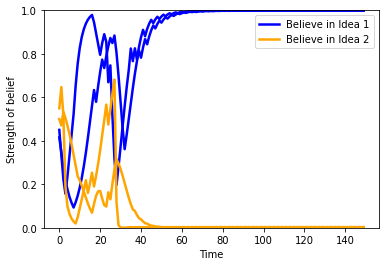

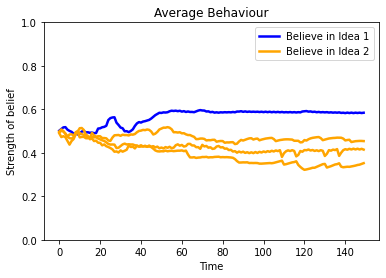

Text(0.5, 0, 'Timesteps')

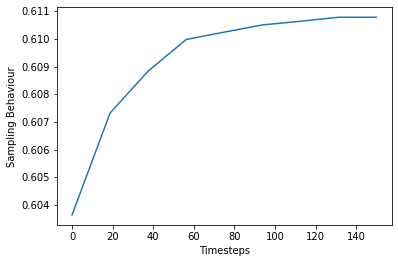

In [25]:
highest_sr = np.where(params.sampling_ratios[:,0,-1] == max(params.sampling_ratios[:,0,-1]))[0][0]

print("Highest Sampling Ratio")
sr_params = list(params.get_param_combinations())[highest_sr]
print(sr_params)
params.update_params(sr_params)
params.get_all_sim_results_from_parameters()
plots.plot_beliefs_over_time(params.all_qs[-20,:,:,:])
plt.show()
plots.plot_beliefs_over_time(np.average([params.all_qs[i,:,:,:] for i in range(params.n_trials)], axis=0))
plt.title("Average Behaviour")
plt.show()
in_samples, out_samples = params.sampling_ratios[highest_sr]

plt.plot(np.linspace(0,150,9), in_samples, label="in group samples")
#plt.plot(["0-5", "5-10", "10-15","15-20", "20-25","25-30","30-35","35-40","40-45","45-50"], out_samples, label = "out group samples")
plt.ylabel("Sampling Behaviour")
plt.xlabel("Timesteps")